In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

In [2]:
with open('data/day8_input.txt') as f:
    lines = f.readlines()

In [3]:
# lines = ['30373\n',
#         '25512\n',
#         '65332\n',
#         '33549\n',
#         '35390\n']

In [4]:
lines = [[*line] for line in lines]

In [5]:
def data_list_to_gdf(data):
    data_list = []
    x = 0
    y = 0
    while x < len(lines):
        for line in lines[x]:
            for num in line:
                if line == '\n':
                    continue
                data_list.append({'val':int(line), 'xcoord':x, 'ycoord':y})
                y += 1    
        x += 1
        y=0
    return pd.DataFrame(data_list)

In [6]:
df = data_list_to_gdf(lines)
print(df)

      val  xcoord  ycoord
0       3       0       0
1       1       0       1
2       3       0       2
3       2       0       3
4       1       0       4
...   ...     ...     ...
9796    0      98      94
9797    1      98      95
9798    0      98      96
9799    0      98      97
9800    2      98      98

[9801 rows x 3 columns]


In [7]:
geometry = [Point(xy) for xy in zip(df.xcoord, df.ycoord)]
gdf = gpd.GeoDataFrame(df, geometry=geometry)
gdf.head()

,val,xcoord,ycoord,geometry
0,3,0,0,POINT (0.00000 0.00000)
1,1,0,1,POINT (0.00000 1.00000)
2,3,0,2,POINT (0.00000 2.00000)
3,2,0,3,POINT (0.00000 3.00000)
4,1,0,4,POINT (0.00000 4.00000)


<AxesSubplot:>

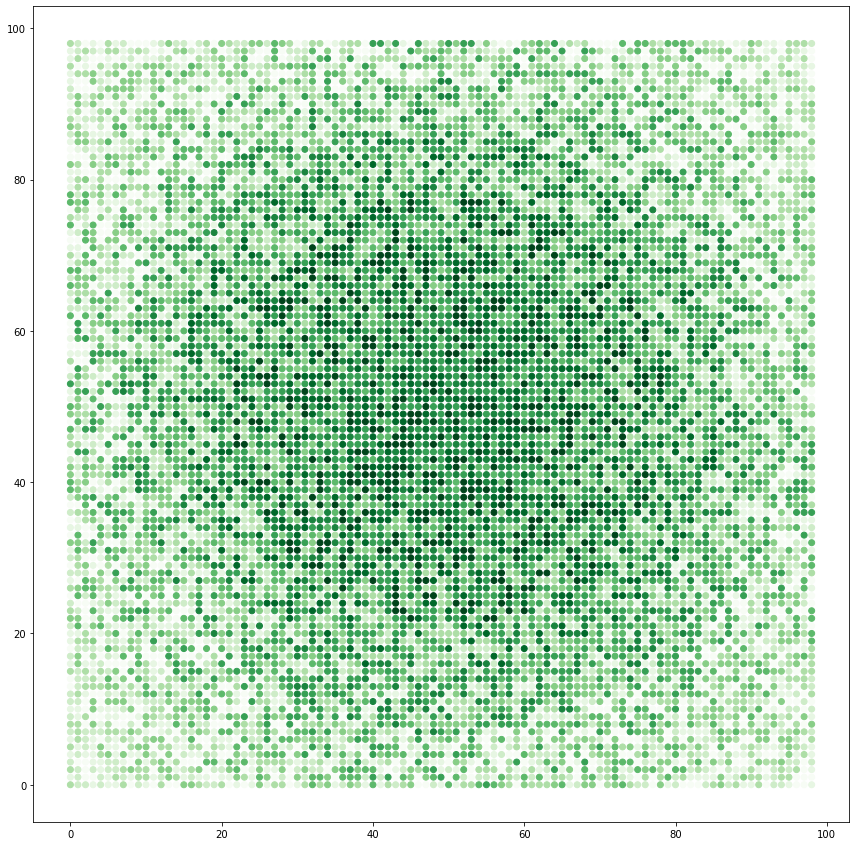

In [8]:
gdf.plot('val', cmap = 'Greens', figsize=(15,15))

In [9]:
considering_row = 0
highest_value = -1
for i, tree in gdf.iterrows():
    if tree['val'] > highest_value:
        gdf.loc[i, 'visible'] = True
        highest_value = tree['val']
    
    if tree['xcoord'] != considering_row:
        # We've moved to a new row - reset highest_value to -1
        considering_row = tree['xcoord']
        highest_value = -1

<AxesSubplot:>

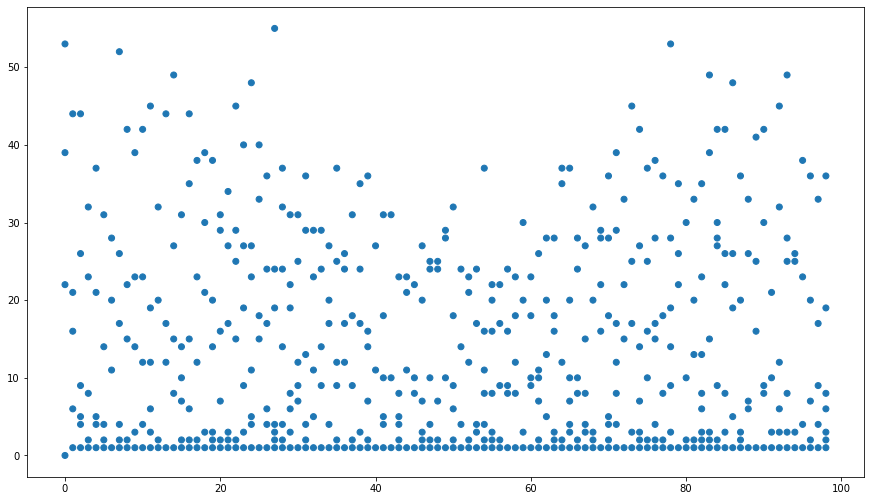

In [10]:
gdf.plot('visible', figsize=(15,15))